# 1. Dependencias y Setup

In [1]:
import tensorflow as tf
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 2. Cargar data

In [3]:
data = tf.keras.utils.image_dataset_from_directory('dataMulti')

Found 612 files belonging to 4 classes.


In [4]:
data_iterator = data.as_numpy_iterator()

In [5]:
batch = data_iterator.next()

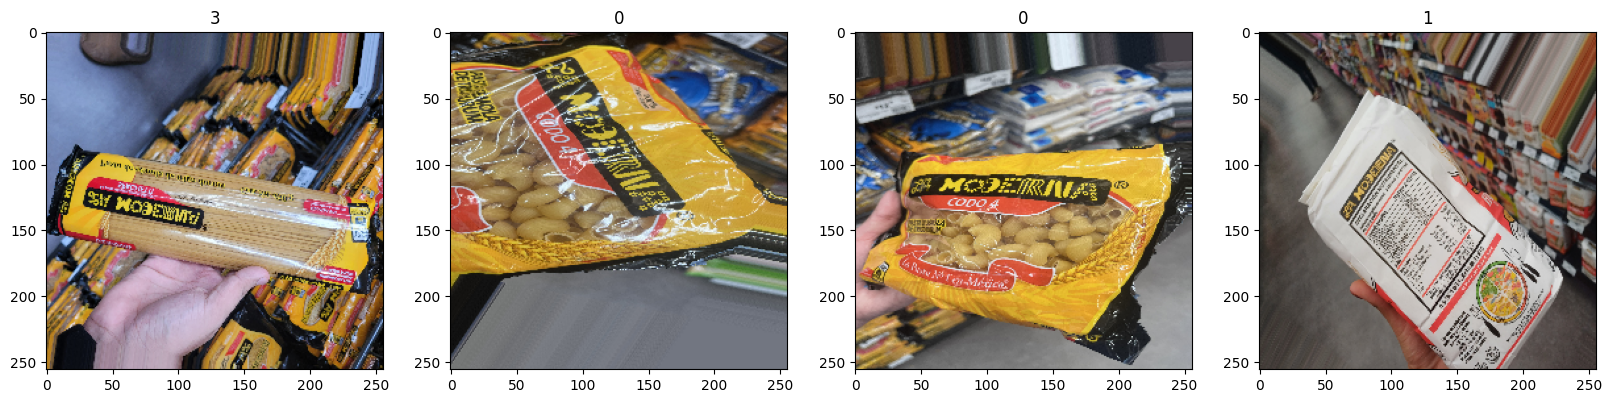

In [6]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Escalar data

In [7]:
data = data.map(lambda x,y: (x/255, y))

# 5. Split Data

In [8]:
len(data)

20

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train_size+val_size+test_size

20

In [14]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. ML

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [16]:
model = Sequential()

In [17]:
model.add(Conv2D(32, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [18]:
model.compile('adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

# 7. Entrenamiento

In [20]:
model.fit(train, epochs=30, validation_data=val)

Epoch 1/30
14/14 [==============================] - 16s 980ms/step - loss: 1.6086 - accuracy: 0.3705 - val_loss: 1.1855 - val_accuracy: 0.4297
Epoch 2/30
14/14 [==============================] - 16s 1s/step - loss: 0.9211 - accuracy: 0.6652 - val_loss: 0.6150 - val_accuracy: 0.7188
Epoch 3/30
14/14 [==============================] - 16s 1s/step - loss: 0.6605 - accuracy: 0.7232 - val_loss: 0.5731 - val_accuracy: 0.7812
Epoch 4/30
14/14 [==============================] - 16s 984ms/step - loss: 0.3908 - accuracy: 0.8772 - val_loss: 0.3492 - val_accuracy: 0.8594
Epoch 5/30
14/14 [==============================] - 16s 976ms/step - loss: 0.2895 - accuracy: 0.9018 - val_loss: 0.2121 - val_accuracy: 0.9375
Epoch 6/30
14/14 [==============================] - 16s 1s/step - loss: 0.1736 - accuracy: 0.9531 - val_loss: 0.1404 - val_accuracy: 0.9609
Epoch 7/30
14/14 [==============================] - 16s 982ms/step - loss: 0.0887 - accuracy: 0.9777 - val_loss: 0.0594 - val_accuracy: 0.9922
Epoch 8/

# 9. Evaluación

In [21]:
#Import load_model
# from tensorflow.keras.models import load_model
loss, accuracy = model.evaluate(train)
print(f'Train Accuracy: {accuracy}')
print(f'Train Loss: {loss}')

14/14 [==============================] - 5s 222ms/step - loss: 1.3622e-04 - accuracy: 1.0000
Train Accuracy: 1.0
Train Loss: 0.0001362187904305756


# 10. Test

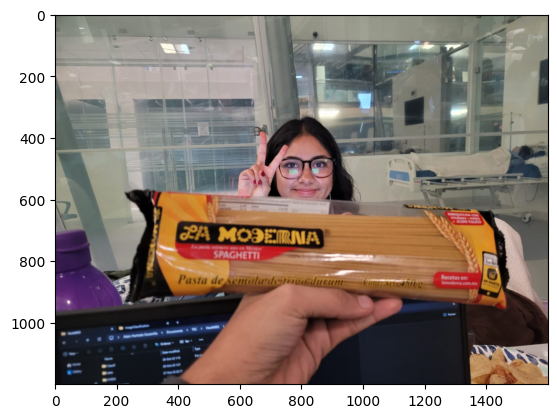

1/1 [==============================] - 0s 87ms/step
[[0.   0.92 0.   0.08]]
1
Harina


In [22]:
tituloTest = 'PruebaSpaghetti.jpeg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#Import image for recognition
img = cv2.imread(tituloTest)
img = cv2.resize(img, (256,256))
img = img.reshape(1,256,256,3)
img = img/255
prediction = model.predict(img)
#Print prediction in percentage format
print(np.round(prediction,2))
index = np.argmax(prediction)
print(index)
#Print prediction in text format
if index == 0:
    print('Coditos')
elif index == 1:
    print('Harina')
elif index == 2:
    print('Macarrones')
elif index == 3:
    print('Spaghetti')

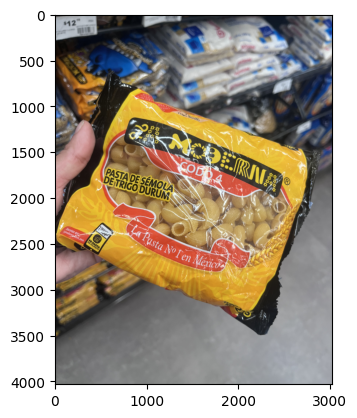

1/1 [==============================] - 0s 26ms/step
[[0. 1. 0. 0.]]
1
Harina


In [23]:
tituloTest = 'PruebaCoditos.jpg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#Import image for recognition
img = cv2.imread(tituloTest)
img = cv2.resize(img, (256,256))
img = img.reshape(1,256,256,3)
img = img/255
prediction = model.predict(img)
#Print prediction in percentage format
print(np.round(prediction,2))
index = np.argmax(prediction)
print(index)
#Print prediction in text format
if index == 0:
    print('Coditos')
elif index == 1:
    print('Harina')
elif index == 2:
    print('Macarrones')
elif index == 3:
    print('Spaghetti')

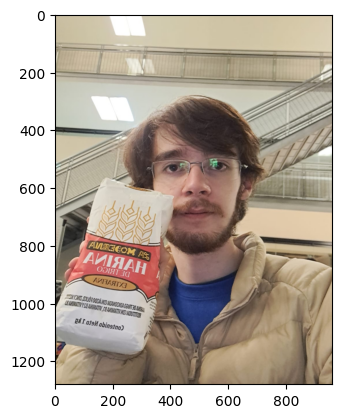

1/1 [==============================] - 0s 29ms/step
[[0.   0.99 0.   0.01]]
1
Harina


In [24]:
tituloTest = 'PruebaHarina.jpeg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#Import image for recognition
img = cv2.imread(tituloTest)
img = cv2.resize(img, (256,256))
img = img.reshape(1,256,256,3)
img = img/255
prediction = model.predict(img)
#Print prediction in percentage format
print(np.round(prediction,2))
index = np.argmax(prediction)
print(index)
#Print prediction in text format
if index == 0:
    print('Coditos')
elif index == 1:
    print('Harina')
elif index == 2:
    print('Macarrones')
elif index == 3:
    print('Spaghetti')

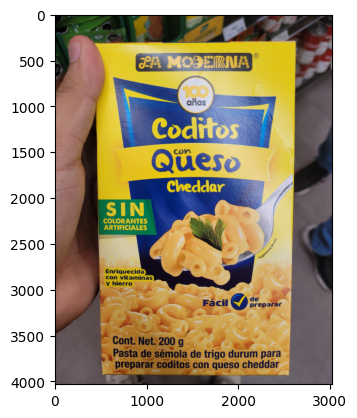

1/1 [==============================] - 0s 25ms/step
[[0.   0.08 0.   0.92]]
3
Spaghetti


In [25]:
tituloTest = 'PruebaMacarrones.jpg'
img = cv2.imread(tituloTest)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()
#Import image for recognition
img = cv2.imread(tituloTest)
img = cv2.resize(img, (256,256))
img = img.reshape(1,256,256,3)
img = img/255
prediction = model.predict(img)
#Print prediction in percentage format
print(np.round(prediction,2))
index = np.argmax(prediction)
print(index)
#Print prediction in text format
if index == 0:
    print('Coditos')
elif index == 1:
    print('Harina')
elif index == 2:
    print('Macarrones')
elif index == 3:
    print('Spaghetti')

In [ ]:
#model.save(os.path.join('models','lamoderna.h5'))
# new_model = load_model('./models/lamoderna.h5')